In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('suicide.csv')

In [3]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,60-80,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,60-80,233
237516,West Bengal,2012,Social_Status,Married,Male,60-80,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,60-80,189


In [4]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
df[df.duplicated()]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


# Questions

# 1. Top 5 states having the highest rate of suicides

In [7]:
df1=df.groupby('State').sum()
df1=df1.reset_index()
df1

,State,Year,Total
0,A & N Islands,13467646,8109
1,Andhra Pradesh,13626140,814059
2,Arunachal Pradesh,13457686,6633
3,Assam,13616124,172276
4,Bihar,13624142,46214
5,Chandigarh,13477631,5164
6,Chhattisgarh,13624137,302354
7,D & N Haveli,13451588,3430
8,Daman & Diu,13463643,1391
9,Delhi (Ut),13608083,84272


In [8]:
df1.drop('Year',axis=1)

,State,Total
0,A & N Islands,8109
1,Andhra Pradesh,814059
2,Arunachal Pradesh,6633
3,Assam,172276
4,Bihar,46214
5,Chandigarh,5164
6,Chhattisgarh,302354
7,D & N Haveli,3430
8,Daman & Diu,1391
9,Delhi (Ut),84272


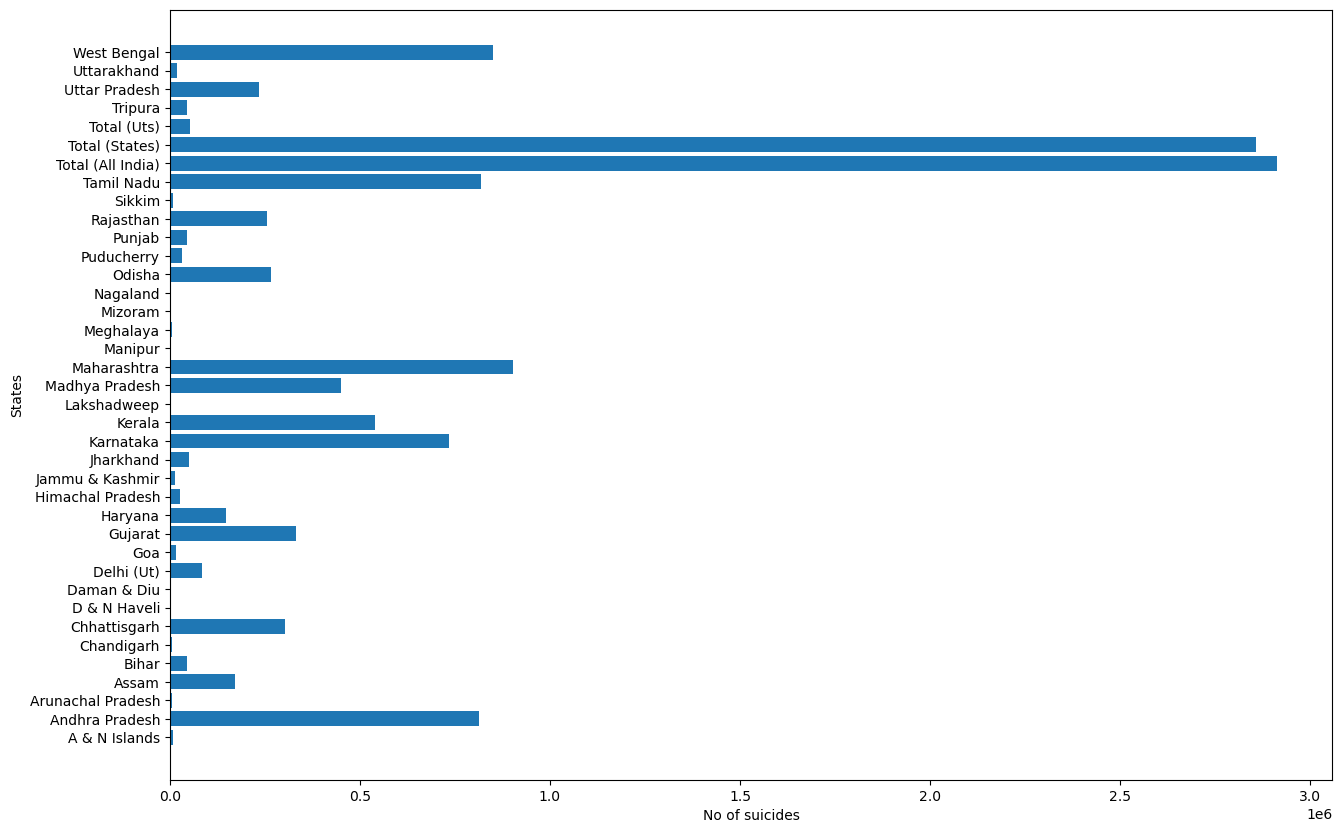

In [9]:
plt.figure(figsize=(15,10))
plt.barh(df1['State'],df1['Total'])
plt.xlabel('No of suicides')
plt.ylabel('States')
plt.show()

In [10]:
df1 = df1[df1.State!='Total (States)']
df1 = df1[df1.State!='Total (All India)']
df1 = df1[df1.State!='Total (Uts)']

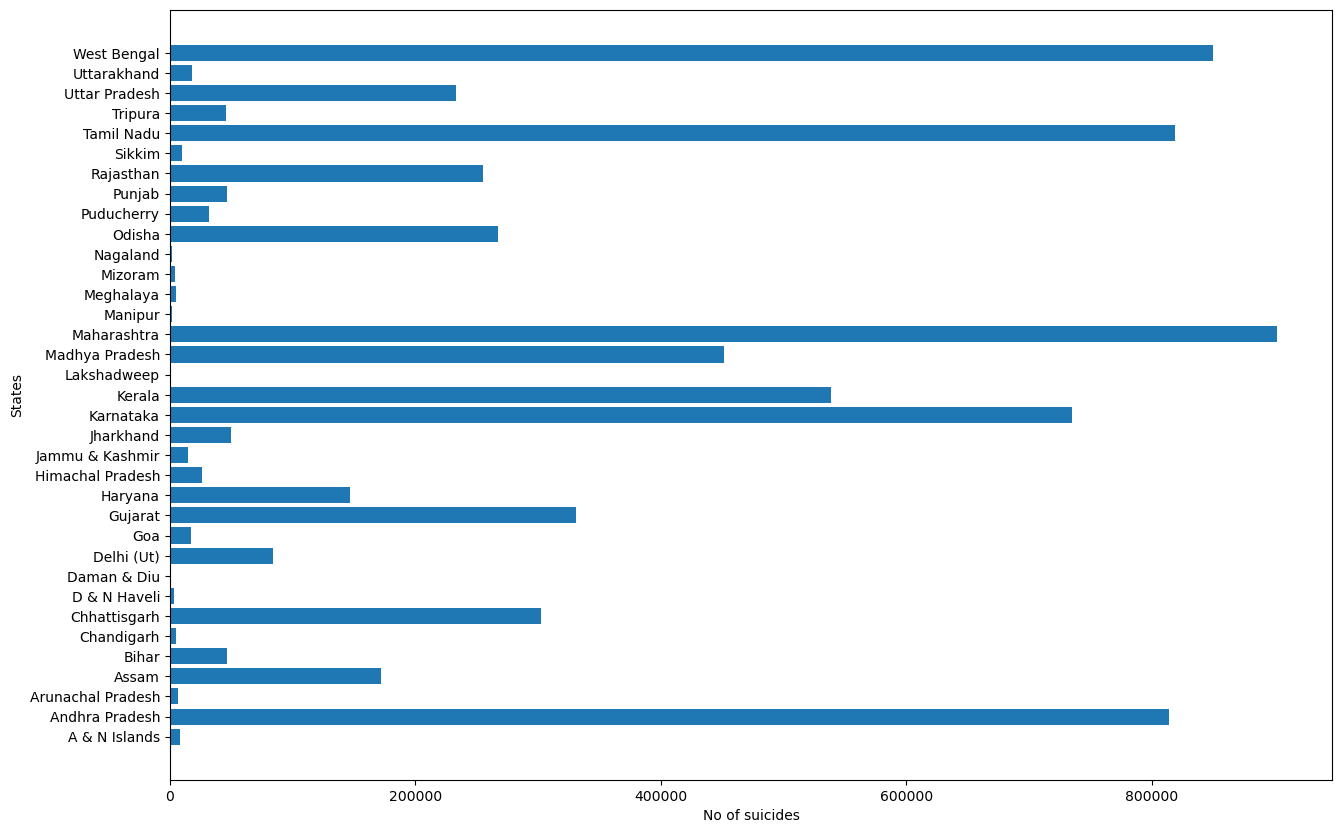

In [11]:
plt.figure(figsize=(15,10))
plt.barh(df1['State'],df1['Total'])
plt.xlabel('No of suicides')
plt.ylabel('States')
plt.show()

# 2. Find out the most common suicide cause among females in India over the          entire period 2010–2012

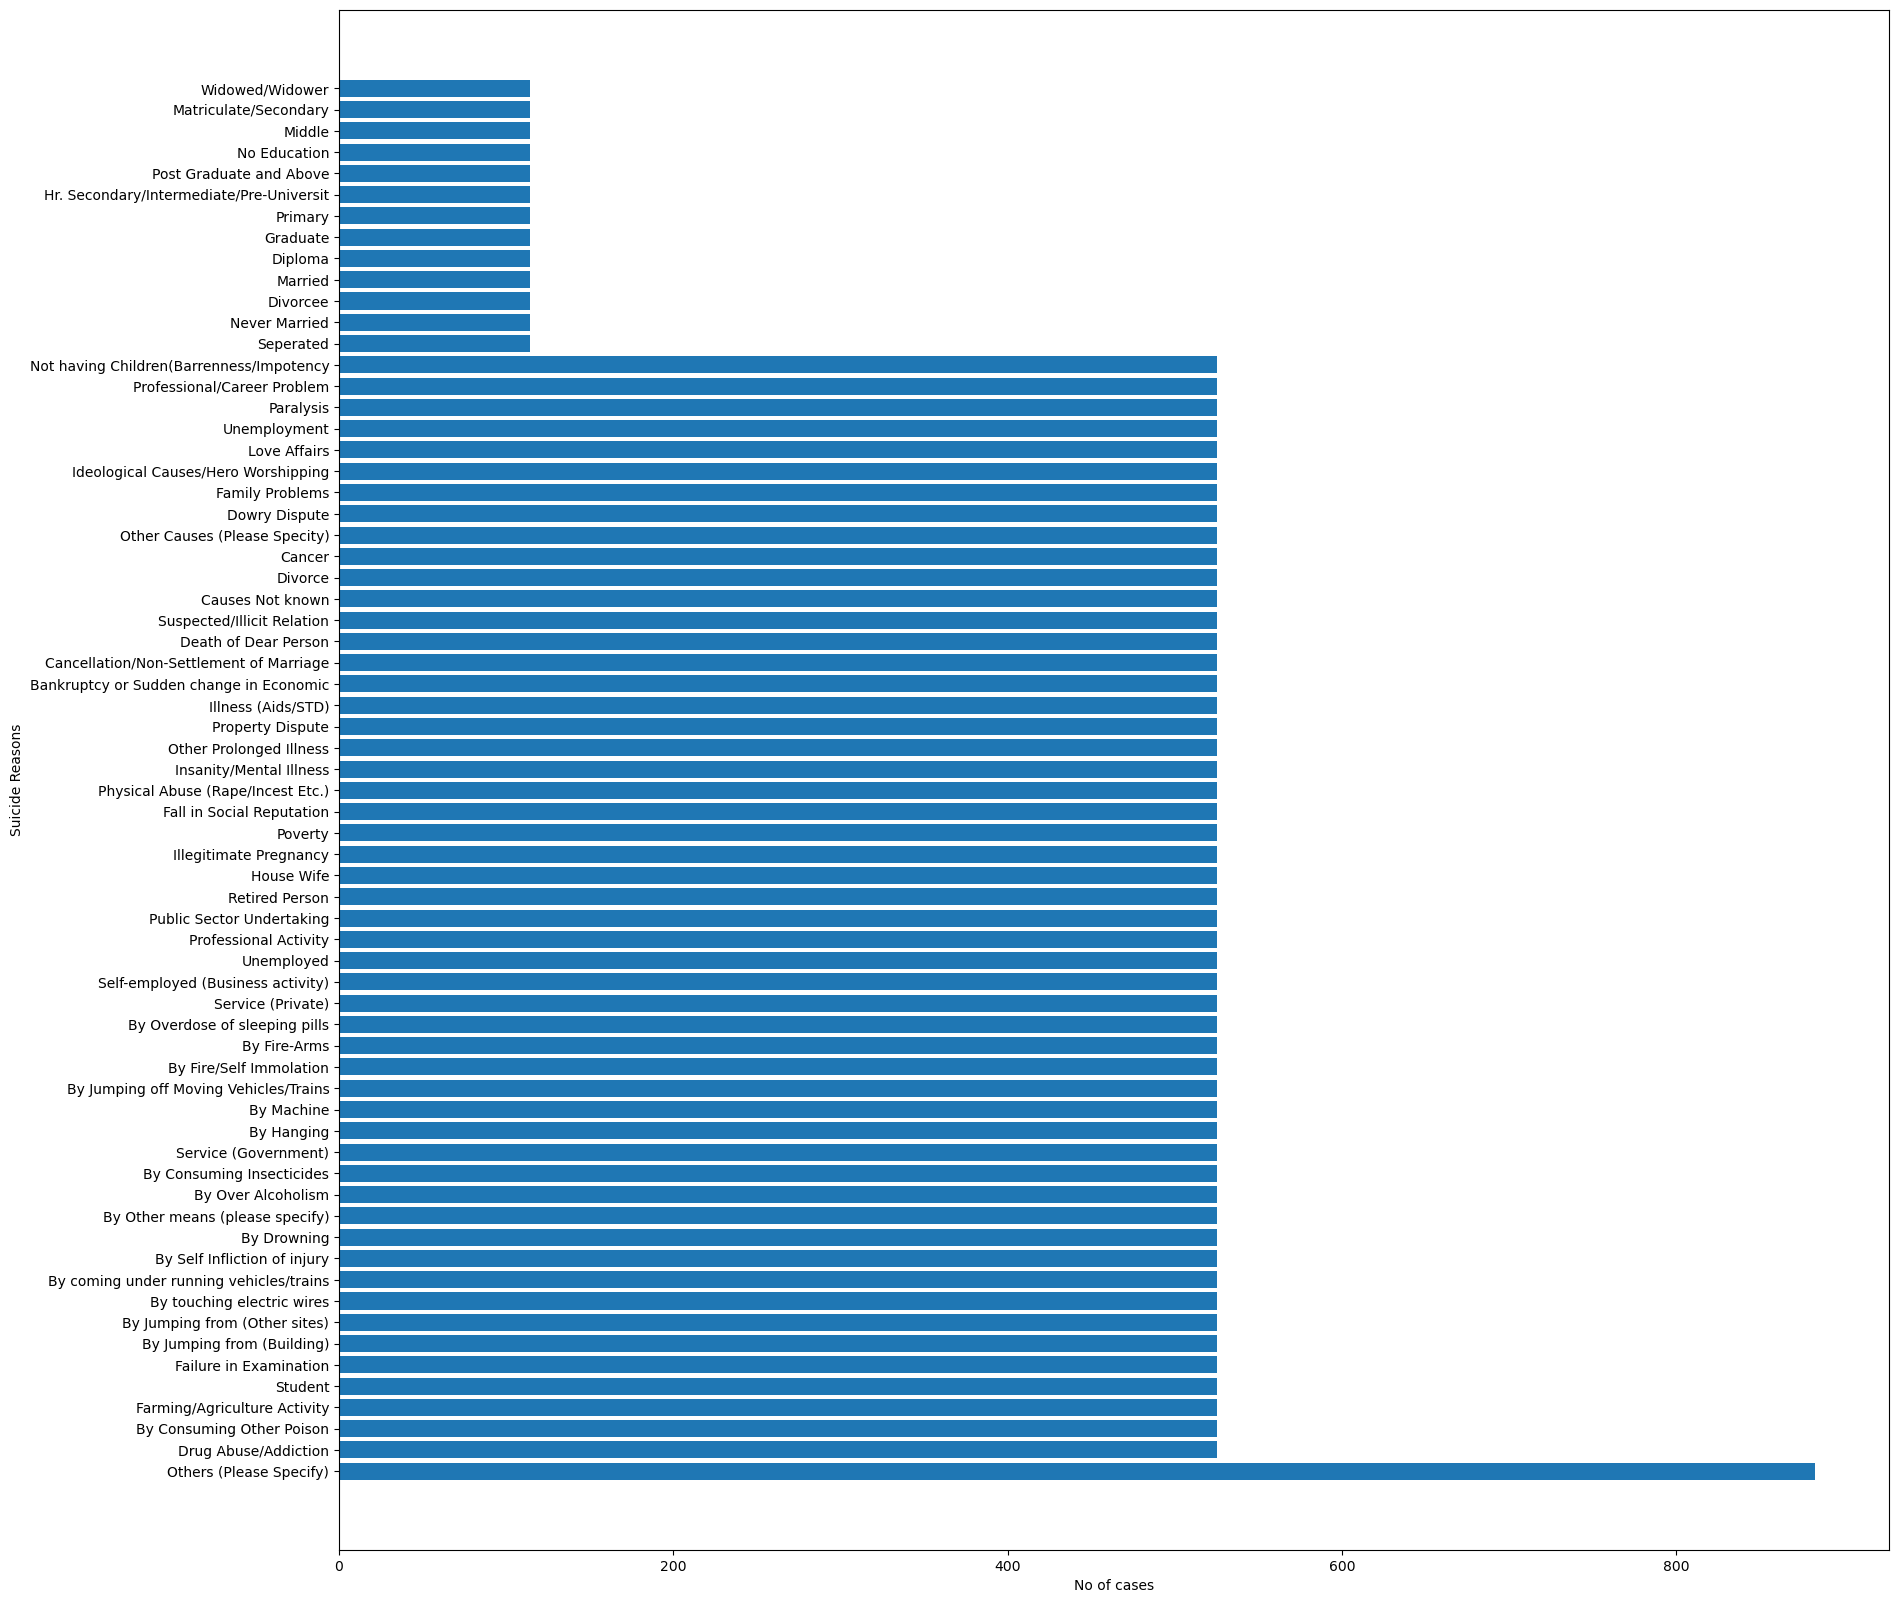

In [12]:
x = df['Type'][(df['Year']>=2010) & (df['Year']<=2012) & (df['Gender']=='Female')].value_counts().keys().to_list()
y = df['Type'][(df['Year']>=2010) & (df['Year']<=2012) & (df['Gender']=='Female')].value_counts()
plt.figure(figsize=(20, 20))
plt.barh(x,y)
plt.xlabel('No of cases')
plt.ylabel('Suicide Reasons')
plt.show()

# 3. 2005 - 2010 female suicide cases

In [13]:
len(df[(df['Year']>=2005) & (df['Year']<=2010) & (df['Gender']=='Female')])

59322

# 4. For How many suicide cases 'failiure in Examination' is the reason and how many man for that same reason?

In [14]:
df[df['Type']=='Failure in Examination']

,State,Year,Type_code,Type,Gender,Age_group,Total
11,A & N Islands,2001,Causes,Failure in Examination,Female,0-14,0
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
72,A & N Islands,2001,Causes,Failure in Examination,Female,15-29,2
100,A & N Islands,2001,Causes,Failure in Examination,Male,15-29,1
117,A & N Islands,2001,Causes,Failure in Examination,Female,30-44,0
...,...,...,...,...,...,...,...
237107,West Bengal,2012,Causes,Failure in Examination,Male,30-44,0
237136,West Bengal,2012,Causes,Failure in Examination,Female,45-59,0
237158,West Bengal,2012,Causes,Failure in Examination,Male,45-59,0
237190,West Bengal,2012,Causes,Failure in Examination,Female,60+,0


In [15]:
len(df[(df['Type']=='Failure in Examination') & (df["Gender"]=="Male")])

2100

# 5. What is the major reason of suicides?

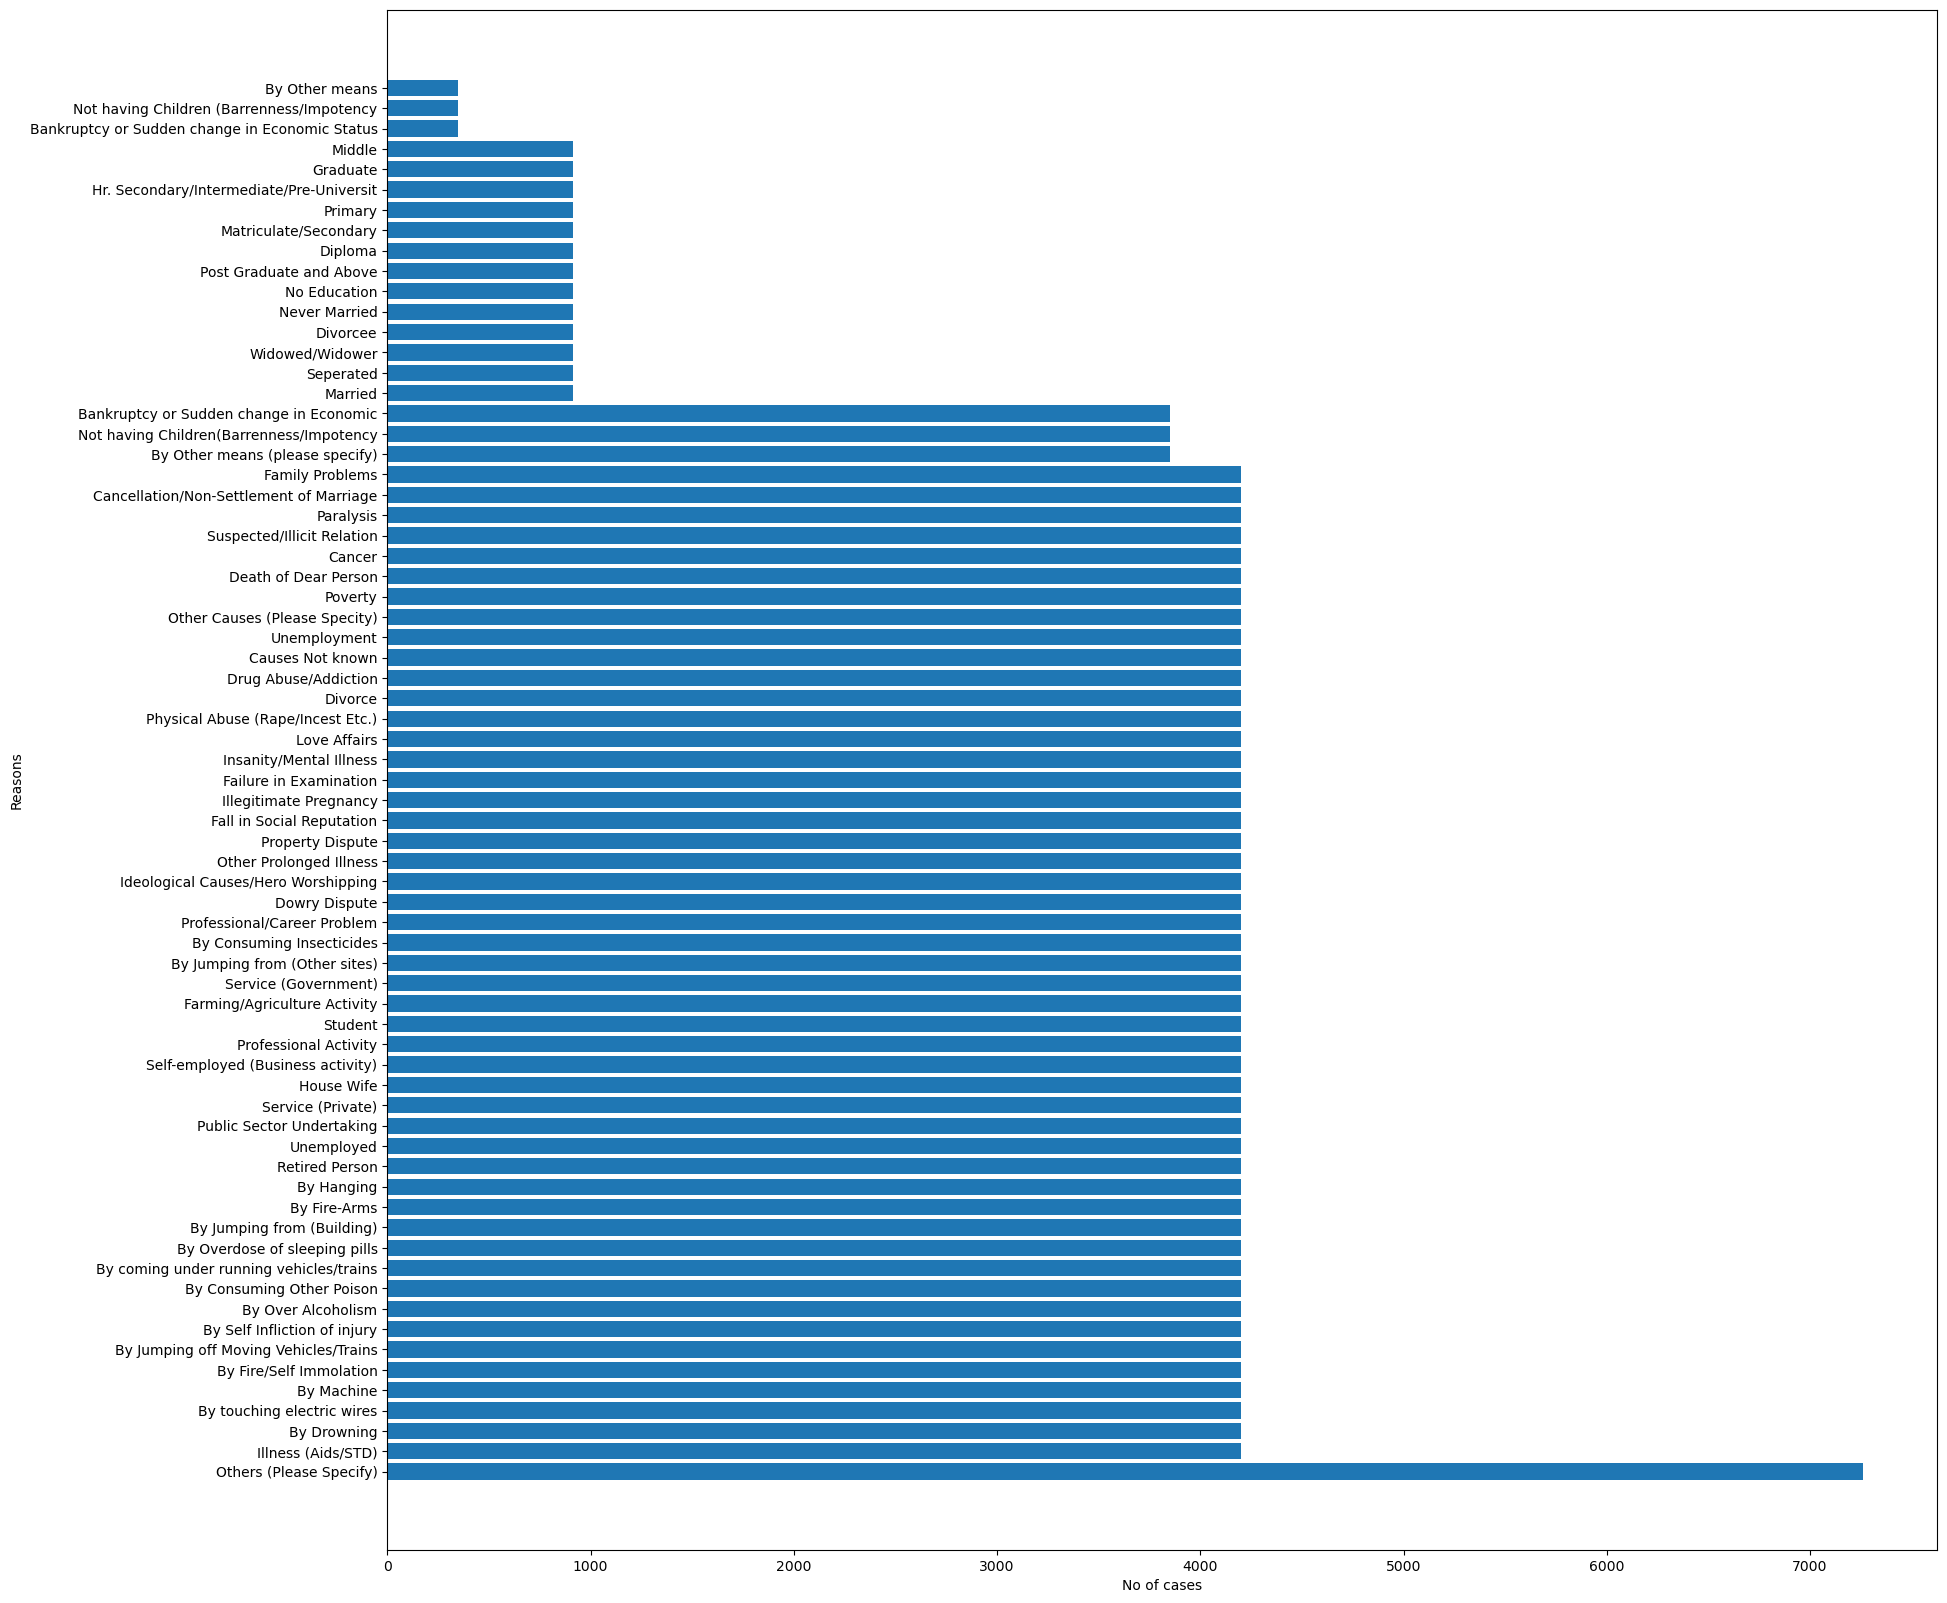

In [16]:
x = df['Type'].value_counts().keys().to_list()
y = df['Type'].value_counts()
plt.figure(figsize=(20, 20))
plt.barh(x, y)
plt.xlabel('No of cases')
plt.ylabel('Reasons')
plt.show()

# 6. In 2010 how many married women committed suicide

In [17]:
len(df[(df['Year']==2010) & (df['Type']=='Married') & (df['Gender']=='Female')])

38

# 7. In which year the suicide cases are maximum

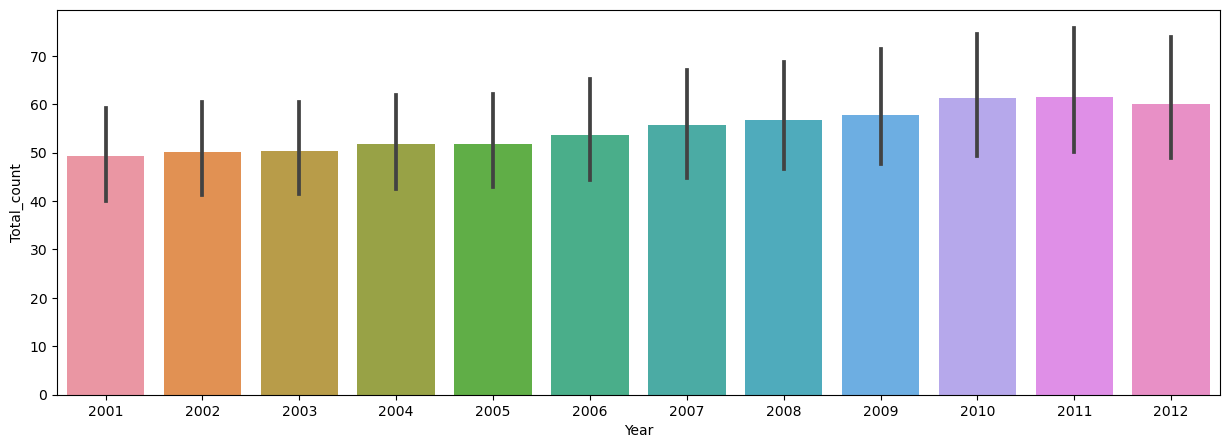

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Year'],y=df['Total'])
plt.xlabel('Year')
plt.ylabel('Total_count')
plt.show()

# 8. In which age-group the number of suicides are least

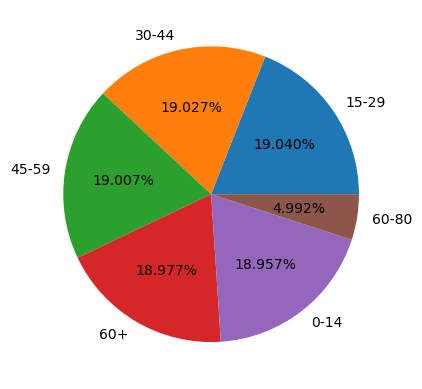

In [19]:
x = df['Age_group'].value_counts()
y = df['Age_group'].value_counts().keys().to_list()
plt.pie(x,labels=y,autopct='%1.3f%%')
plt.show()

# 9. Suicide Rates Male VS Female

In [21]:
df3=df.groupby("Gender").sum()
df3=df3.reset_index()
df3

,Gender,Year,Total
0,Female,238051222,4702974
1,Male,238530758,8368760


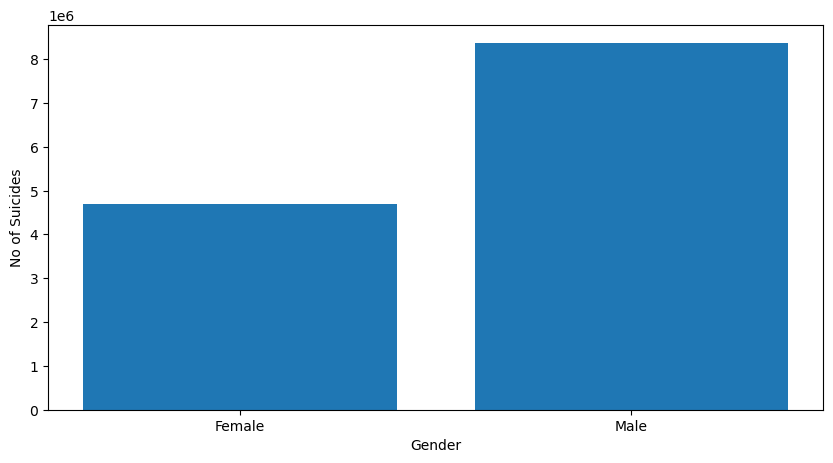

In [22]:
plt.figure(figsize=(10,5))
plt.bar(df3['Gender'],df3['Total'])
plt.xlabel('Gender')
plt.ylabel('No of Suicides')
plt.show()

# 10. How many suicides happened below 30 years of age? 

In [23]:
df['Age_group'].value_counts()

15-29    45223
30-44    45193
45-59    45146
60+      45074
0-14     45027
60-80    11856
Name: Age_group, dtype: int64

In [24]:
len(df[(df['Age_group']=='0-14') | (df['Age_group']=='15-29')])

90250

# 11. For How many suicide cases 'love affair' is the reason.

In [25]:
len(df[df['Type']=='Love Affairs'])

4200

# Inferences/Conclusions

In [26]:
# 1. 1st Maharashtra
#    2nd West Bengal
#    3rd Andhra Pradesh
#    4th Tamil Nadu
#    5th Karnatka
# are the top 5 states having max suicide rate
# In this, Maharashra is having the highest suicide cases.

In [ ]:
# 2."others" reason is having maximum value in bar graph. In 2010 to 2012, maximum females comitted suicide due to unkown 
#    reasons.

In [ ]:
# 3. 59322 females comitted suicide in year between 2005 to 2010

In [ ]:
# 4. 4200 studest are depressed due to the failiure in exam and committed suicide and amoung them 2100 are male and 
#    rest are female.

In [ ]:
# 5. Maximum suicide cases are due to unknown reasons

In [ ]:
# 6. In 2010, 38 women were not happy after marriage and thus committed suicide

In [ ]:
# 7. In year 2011 highest no of suicides were comitted.

In [ ]:
# 8. People belongs to 60- 80 age group can rarely commit suicide

In [ ]:
# 9. Males are commiting suicides more than females.

In [ ]:
# 10. People belongs to age group 0 -29  is 90250

In [ ]:
# 11. Suicide cases due to love affair were 4200.